## 1. Understanding Business
Airbnb Inc, is an American online marketplace and hospitality service brokerage company based in San Francisco, California, United States. Members can use the service to arrange or offer lodging, primarily homestays, or tourism experiences.

The booking price of the properties vary according various attributes like its location, property type, size, number of rooms, amenities, day of the week and month of the year etc. Airbnb made its dataset about property listings in Seattle in 2016 publicly available on Kaggle. Our goal is to study this dataset to understand what the major trends in the pricing over the year and across the neighbourhoods in Seattle. We also want to understand through statistical modelling about how each of the attributes related to the property might be influencing the booking price on Airbnb.

## 2. Understanding Data
Importing necessary libraris.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

Reading datasets.

In [2]:
s_calendar = pd.read_csv("./data/seattle/calendar.csv")
s_reviews = pd.read_csv("./data/seattle/reviews.csv")
s_listings = pd.read_csv("./data/seattle/listings.csv")

Understanding the information present in the dataset through the columns present in the datasets.

In [3]:
s_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
s_calendar.shape

(1393570, 4)

In [5]:
s_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
for column in s_listings.columns.tolist():
    print(column)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_re

In [7]:
s_listings.shape

(3818, 92)

In [8]:
s_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
s_reviews.shape

(84849, 6)

## 3. Preparation of Data

In [10]:
s_listings["price"].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [11]:
s_calendar["price"].head()

0    $85.00
1    $85.00
2       NaN
3       NaN
4       NaN
Name: price, dtype: object

As we can note that the price attribute is supposed to have numerical values but the data type is object because it stores strings with '$' signs. We need to convert this column into numerical data type.

In [12]:
"""
    Converts price in the string format like "$1,125.00" into numeric value 1125.00
    INPUT:
    - string price in string format
    OUTPUT:
    - float value corresponding to the price or None if the input is not parseable to float
"""
def str_to_num (string):
    if string is not None:
        if type(string) is str and string.startswith('$'):
            return float(string.replace('$', '').replace(',', ''))
        else:
            return None
    else:
        return None

In [13]:
s_listings_cleaned = pd.concat([s_listings.drop('price', axis=1), s_listings["price"].apply(str_to_num)], axis=1)
s_listings_cleaned['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [14]:
s_calendar_cleaned = pd.concat([s_calendar.drop('price', axis=1), s_calendar["price"].apply(str_to_num)], axis=1)
s_calendar_cleaned['price'].head()

0    85.0
1    85.0
2     NaN
3     NaN
4     NaN
Name: price, dtype: float64

In [15]:
s_calendar_cleaned['available'] = s_calendar_cleaned['available'] == 't'
s_calendar_cleaned['available'].head()

0     True
1     True
2    False
3    False
4    False
Name: available, dtype: bool

In [16]:
s_calendar_cleaned["date"].dtype

dtype('O')

In [17]:
s_calendar_cleaned["date"] = pd.to_datetime(s_calendar_cleaned["date"], format="%Y-%m-%d")

In [18]:
 s_calendar_cleaned["date"].dtype

dtype('<M8[ns]')

In [19]:
s_calendar_cleaned["date"].head()

0   2016-01-04
1   2016-01-05
2   2016-01-06
3   2016-01-07
4   2016-01-08
Name: date, dtype: datetime64[ns]

In [20]:
s_listings_cleaned["location_categorical"] = s_listings_cleaned.apply(lambda row: str((format(row.latitude, '.2f'), format(row.longitude, '.2f'))), axis=1)

In [21]:
s_listings_cleaned.location_categorical.head()

0    ('47.64', '-122.37')
1    ('47.64', '-122.37')
2    ('47.63', '-122.37')
3    ('47.64', '-122.37')
4    ('47.63', '-122.37')
Name: location_categorical, dtype: object

In [22]:
list(map(lambda amenity : amenity.replace("\"","").replace("{","").replace("}", ""), s_listings_cleaned.amenities.iloc[0].split(",")))

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [23]:
"""
    Separates the string value of `amenities` attribute in the row, into a list of individual amenities.
    
    INPUT:
    - row : from dataset having amenities attribute
    OUTPUT:    
    - list of amenities derived from the value of `amenities` attribute in row
"""
def separate_amenities(row):
    amenities = row.amenities
    list_to_return = []
    if (amenities is not None and type(amenities) == str):            
        list_to_return = list(map(lambda amenity : amenity.replace("\"","").replace("{","").replace("}", ""), amenities.split(",")))
    if '' in list_to_return:
        list_to_return.remove('')
    return list_to_return
s_listings_cleaned["amenities_list"] = s_listings_cleaned.apply(separate_amenities, axis=1)

In [24]:
possible_amenities = s_listings_cleaned['amenities_list'].apply(pd.Series).stack().unique()
possible_amenities

array(['TV', 'Cable TV', 'Internet', 'Wireless Internet',
       'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly',
       'Washer', 'Dryer', 'Free Parking on Premises',
       'Buzzer/Wireless Intercom', 'Smoke Detector',
       'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card',
       'Fire Extinguisher', 'Essentials', 'Pets Allowed',
       'Pets live on this property', 'Dog(s)', 'Cat(s)', 'Hot Tub',
       'Indoor Fireplace', 'Shampoo', 'Breakfast', '24-Hour Check-in',
       'Hangers', 'Hair Dryer', 'Iron', 'Laptop Friendly Workspace',
       'Suitable for Events', 'Elevator in Building',
       'Lock on Bedroom Door', 'Wheelchair Accessible', 'Gym', 'Pool',
       'Smoking Allowed', 'Other pet(s)', 'Doorman', 'Washer / Dryer'],
      dtype=object)

In [25]:
"""
    Assigns new boolean attribute to the row based on the presence of that amenity in the list.
    Returns updated row with additional attributes corresponding to the amenities added to it.
    
    INPUT:
    - row containing attributes related to the property, including `amenities_list`
    OUTPUT:
    - row containing newly added boolean attributes indicating the presence of each possible type of amenity in the property
"""
def add_amenities_columns (row):
    amenities = set(row.amenities_list)
    for possible_amenity in possible_amenities:
        row["amenity_" + possible_amenity] = possible_amenity in amenities
    return row

s_listings_cleaned = s_listings_cleaned.apply(add_amenities_columns, axis=1)

In [26]:
s_listings_cleaned["instant_bookable"] = s_listings_cleaned["instant_bookable"] == "t"

## Analytical Questions and Answers

### 1. What is the trend in number of properties becoming available on Airbnb over the year 2016?

In [27]:
df = s_calendar_cleaned
df = df.groupby('listing_id', group_keys=False)\
    .apply(lambda x: x[x.available.ne(x.available.shift())])\
    .reset_index(drop=True)
df.head(20)

,listing_id,date,available,price
0,3335,2016-01-04,False,NaN
1,3335,2016-02-29,True,120.0
2,4291,2016-01-04,True,82.0
3,5682,2016-01-04,False,NaN
4,5682,2016-01-11,True,50.0
5,5682,2016-01-16,False,NaN
6,5682,2016-01-19,True,49.0
7,5682,2016-01-21,False,NaN
8,5682,2016-01-26,True,50.0
9,5682,2016-01-28,False,NaN


In [28]:
listing_activation_dates = df[df.available == True].groupby("listing_id")[["listing_id","date"]].min()
lower_date = min(s_calendar_cleaned.date)
upper_date = max(s_calendar_cleaned.date)
days = pd.date_range(lower_date, upper_date, freq="D")
number_of_properties_activated_on_date = pd.DataFrame({"date":days, "activated_props": 0}).sort_values(by="date")
number_of_properties_activated_on_date.set_index("date", inplace=True, drop=False)
number_of_properties_activated_on_date_partial = listing_activation_dates.groupby("date")[["listing_id"]].agg(["count"])
number_of_properties_activated_on_date.loc[number_of_properties_activated_on_date_partial.index, "activated_props"] = number_of_properties_activated_on_date_partial.values

In [29]:
number_of_properties_activated_on_date["activations_till_date"] = number_of_properties_activated_on_date["activated_props"].cumsum(axis=0)
# number_of_properties_activated_on_date.head(100)

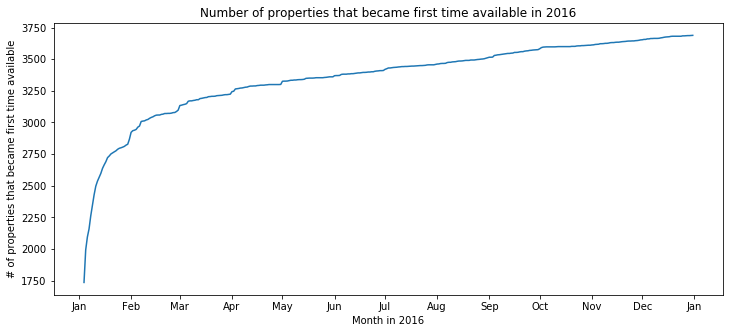

In [30]:
active_in_2016 = number_of_properties_activated_on_date["activations_till_date"]\
                                                            [number_of_properties_activated_on_date["date"] >= pd.to_datetime("2016-01-01")]\
                                                            [number_of_properties_activated_on_date["date"] <= pd.to_datetime("2016-12-31")]
dates = active_in_2016.index
months = mdates.MonthLocator()
month_format = mdates.DateFormatter("%b")
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
ax.plot(dates, active_in_2016)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_format)
yticks = ax.get_yticks()
ax.set_xlabel("Month in 2016")
ax.set_ylabel("# of properties that became first time available")
ax.set_title("Number of properties that became first time available in 2016")
plt.show()

It is evident from this plot that number of properties that became first time available during 2016 increased rapidly between January to March. After that, the rate of growth slowed down, but the properties becoming first time available during the year continued to grow throughout the year.

### 2. What is the trend in occupancy of properties over the year 2016?

In [31]:
s_calendar_cleaned.groupby("date")[["date", "available"]].agg(["sum"]).head()

,available
,sum
date,
2016-01-04,1735.0
2016-01-05,1867.0
2016-01-06,1826.0
2016-01-07,1776.0
2016-01-08,1782.0


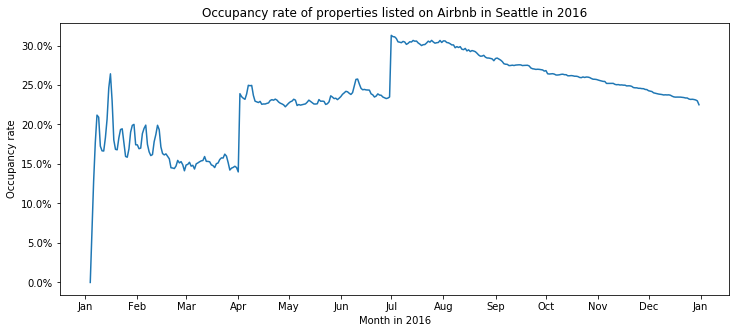

In [32]:
availability_by_date = s_calendar_cleaned.groupby("date")[["date","available"]].agg(["sum"]).sort_values(by="date")
availability_in_2016 = availability_by_date[pd.to_datetime("2016-01-01") <= availability_by_date.index][availability_by_date.index <= pd.to_datetime("2016-12-31")][("available","sum")]
active_in_2016 = number_of_properties_activated_on_date[pd.to_datetime("2016-01-01") <= number_of_properties_activated_on_date.index][number_of_properties_activated_on_date.index <= pd.to_datetime("2016-12-31")]["activations_till_date"]
dates = availability_in_2016.index
occupancy_rate = (1 - availability_in_2016/active_in_2016) * 100
months = mdates.MonthLocator()
month_format = mdates.DateFormatter("%b")
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
ax.plot(dates, occupancy_rate)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_format)
yticks = ax.get_yticks()
ax.set_yticklabels(['{}%'.format(y) for y in yticks])
ax.set_xlabel("Month in 2016")
ax.set_ylabel("Occupancy rate")
ax.set_title("Occupancy rate of properties listed on Airbnb in Seattle in 2016")
plt.show()

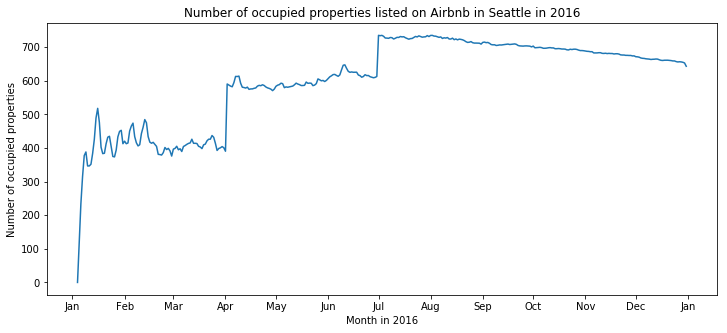

In [33]:
number_of_occupied_props = (occupancy_rate/100.0) * availability_in_2016
months = mdates.MonthLocator()
month_format = mdates.DateFormatter("%b")
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
ax.plot(dates, number_of_occupied_props)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_format)
yticks = ax.get_yticks()
# ax.set_yticklabels(['{}%'.format(y) for y in yticks])
ax.set_xlabel("Month in 2016")
ax.set_ylabel("Number of occupied properties")
ax.set_title("Number of occupied properties listed on Airbnb in Seattle in 2016")
plt.show()

It is evident from the plot that number of poperties occupied remained between 400 to 500. The occupancy jumped significantly in April to reach new level of just above 600. It remained between 600 and 650 during April to July. In July, there was one more surge in the occupancy of properties, which crossed well above 700. After July it started reducing gradually, but still remained well above 650 by the end of the year. Overall, we can claim that increasing number of people occupied properties through Airbnb during 2016 in Seattle.

### 3. What is the trend in average price of booking properties over the year 2016?

In [34]:
avg_price_by_date = s_calendar_cleaned.groupby("date")[["date", "price"]].agg(["mean"])

In [35]:
avg_price_by_date.head(20)

,price
,mean
date,
2016-01-04,122.085879
2016-01-05,120.681307
2016-01-06,120.928258
2016-01-07,120.958896
2016-01-08,127.640853
2016-01-09,127.330819
2016-01-10,120.001991
2016-01-11,118.988942


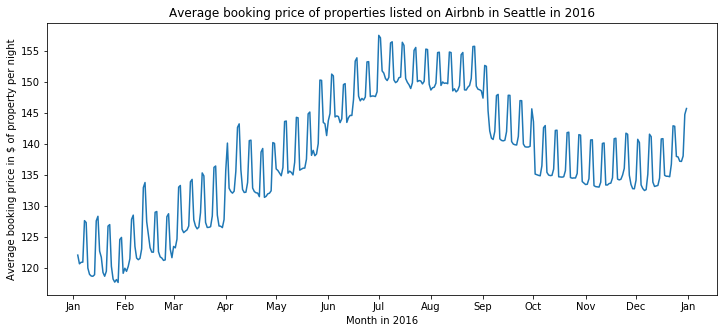

In [36]:
prices_2016 = avg_price_by_date[avg_price_by_date.index >= pd.to_datetime("2016-01-01")][avg_price_by_date.index <= pd.to_datetime("2016-12-31")]
dates = prices_2016.index
months = mdates.MonthLocator()
month_format = mdates.DateFormatter("%b")
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
ax.plot(dates, prices_2016)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_format)
yticks = ax.get_yticks()
# ax.set_yticklabels(['{}%'.format(y) for y in yticks])
ax.set_xlabel("Month in 2016")
ax.set_ylabel("Average booking price in $ of property per night")
ax.set_title("Average booking price of properties listed on Airbnb in Seattle in 2016")
plt.show()

The average price per night of properties listed on Airbnb in Seattle grew steadily between January to July in 2016 from around 125 to 155 USD. It remained high between 150 to 155 USD during summer between July to September. After September, the prices started dropping gradually until it stabilized to somewhere around 140 USD. During the end of December, the prices rised slightly during the Christmas holidays.

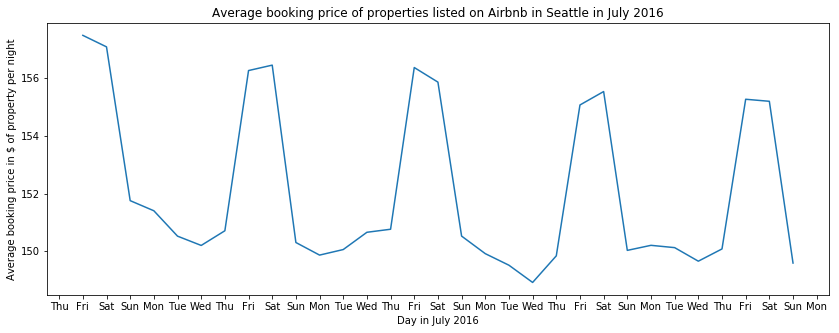

In [37]:
prices_in_summer = avg_price_by_date.loc[pd.date_range('2016-07-01', '2016-07-31')]
dates = prices_in_summer.index
days = mdates.DayLocator()
day_format = mdates.DateFormatter("%a")
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
ax.plot(dates, prices_in_summer)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(day_format)
yticks = ax.get_yticks()
ax.set_xlabel("Day in July 2016")
ax.set_ylabel("Average booking price in $ of property per night")
ax.set_title("Average booking price of properties listed on Airbnb in Seattle in July 2016")
plt.show()

Zooming into the average prices in the month of July 2016, we can see that the price spikes on Friday and Saturday nights.

### 4. What were the types of properties available for booking on Airbnb in Seattle?

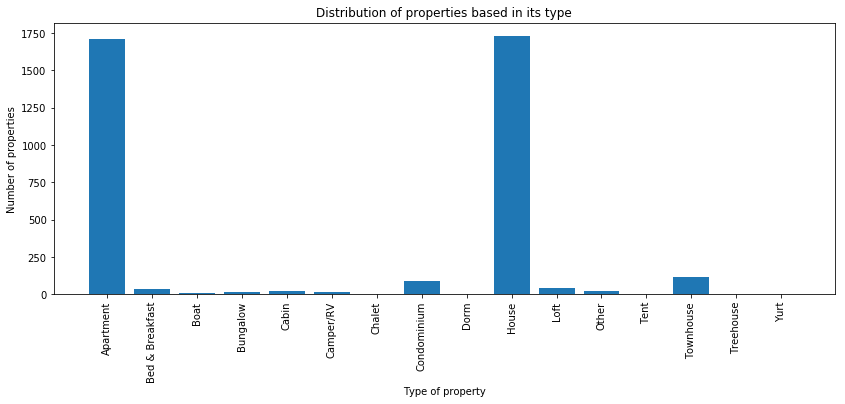

In [38]:
props_by_type = s_listings_cleaned.dropna(subset=["property_type"]).groupby("property_type")["id"].agg(["count"])
plt.figure(figsize=(14,5))
x = props_by_type.index
y = props_by_type["count"]
plt.bar(x, y)
plt.xticks(x, x, rotation="vertical")
plt.ylabel("Number of properties")
plt.xlabel("Type of property")
plt.title("Distribution of properties based in its type")
plt.show()

As we can see, most of the properties listed in Seattle on Airbnb in 2016 are of type Apartment or House. There are also significant number of properties of type Condominium and Townhouse.

### 5. Which are the neighbourhoods with largest properties on average available on Airbnb in 2016?

In [39]:
s_listings_cleaned.dropna(subset=["square_feet"]).groupby("neighbourhood_cleansed")[["neighbourhood_cleansed", "square_feet"]].agg("mean").sort_values(by="square_feet", ascending=False).rename(index=str, columns={"square_feet": "average square feet"}).head(10)

,average square feet
neighbourhood_cleansed,
North Queen Anne,2100.000000
Fairmount Park,1666.666667
Wallingford,1464.285714
Alki,1400.000000
Crown Hill,1376.000000
Minor,1362.500000
Mann,1350.000000
South Lake Union,1200.000000
Pike-Market,1150.000000


North Queen Anne, Fairmount Park, Wallingford and Alki has properties with average size of more than 1400 square feet.

### 6. Which are the neighbourhoods with highest price on average available on Airbnb in 2016?

In [40]:
s_listings_cleaned.dropna(subset=["price"]).groupby("neighbourhood_cleansed")[["neighbourhood_cleansed", "price"]].agg("mean").sort_values(by="price", ascending=False).rename(index=str, columns={"price": "average price per night"}).head(10)

,average price per night
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474
Briarcliff,176.571429
Sunset Hill,176.055556
Industrial District,173.333333
Alki,171.619048


### 7. Which are the neighbourhoods with highest number of properties listed on Airbnb in 2016?

In [41]:
s_listings_cleaned.groupby("neighbourhood_cleansed")[["neighbourhood_cleansed", "id"]].agg(["count"])["id"].sort_values(by="count", ascending=False).rename(index=str, columns={"count": "listings count"}).head(10)

,listings count
neighbourhood_cleansed,
Broadway,397
Belltown,234
Wallingford,167
Fremont,158
Minor,135
University District,122
Stevens,119
First Hill,108
Central Business District,103


### 8. How does the average booking price vary with the size of the property?

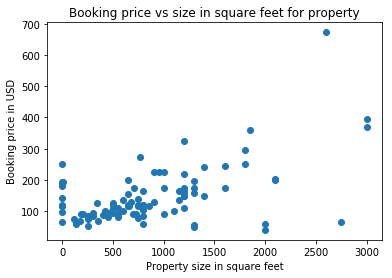

In [42]:
df = s_listings_cleaned.dropna(subset=["square_feet", "price"])
x = df.square_feet
y = df.price
plt.scatter(x, y)
plt.xlabel("Property size in square feet")
plt.ylabel("Booking price in USD")
plt.title("Booking price vs size in square feet for property")
plt.show()

It can be seen that for properties with smaller size of upto 800 square feet, prices are highly correlated with size. This means that the prices for similarly sized properties are similar. However, as the property size increases above 800 square feet, the variation of price among similarly sized properties increases significantly.

### 9. How are different numeric attributes of property correlated to its booking price?

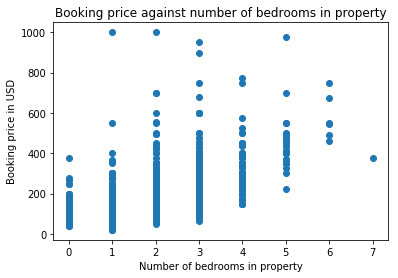

In [43]:
df = s_listings_cleaned.dropna(subset=["bedrooms", "price"])
x = df.bedrooms
y = df.price
plt.scatter(x, y)
plt.xlabel("Number of bedrooms in property")
plt.ylabel("Booking price in USD")
plt.title("Booking price against number of bedrooms in property")
plt.show()

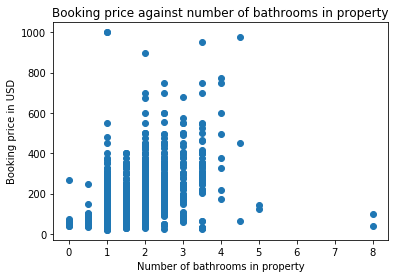

In [44]:
df = s_listings_cleaned.dropna(subset=["bathrooms", "price"])
x = df.bathrooms
y = df.price
plt.scatter(x, y)
plt.xlabel("Number of bathrooms in property")
plt.ylabel("Booking price in USD")
plt.title("Booking price against number of bathrooms in property")
plt.show()

### 9. Can we predict the price of booking a property on given night based on its attributes?

In this case `price` is the target value. We can drop the rows with missing values in this target variable for the purpose of training and evaluating our model.

In [45]:
input_vars_from_listings = ["neighbourhood_cleansed", 
                "neighbourhood_group_cleansed",
                "city",
                "state",
                "zipcode",
                "market",
                "location_categorical",
                "property_type",
                "room_type",
                "accommodates",
                "bathrooms",
                "bedrooms",
                "beds",
                "bed_type",
                "square_feet",
                "guests_included",
                "minimum_nights",
                "maximum_nights",
                "review_scores_rating",
                "review_scores_accuracy",
                  "review_scores_cleanliness",
                  "review_scores_checkin",
                  "review_scores_communication",
                  "review_scores_location",
                  "review_scores_value",
                  "jurisdiction_names",
                  "cancellation_policy",
                  "reviews_per_month",
                  "number_of_reviews"
       ]
amenity_variables = list(map(lambda amenity : "amenity_" + amenity, possible_amenities))
input_vars_from_listings.extend(amenity_variables)


In [46]:
s_calendar_cleaned["month"] = s_calendar_cleaned['date'].dt.month_name()

In [47]:
s_calendar_cleaned["day_of_week"] = s_calendar_cleaned['date'].dt.weekday_name

In [48]:
df = pd.merge(s_listings_cleaned, s_calendar_cleaned, left_on="id", right_on="listing_id", how="inner", suffixes=("_listings", "_calendar"))

In [49]:
df = df.dropna(subset=["price_calendar"])

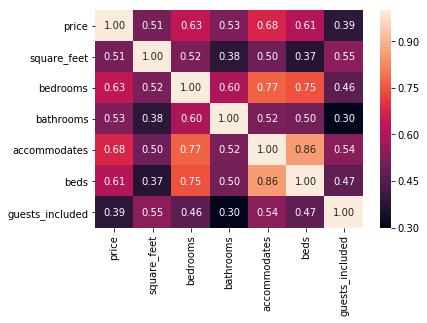

In [50]:
sns.heatmap(df[["price_calendar",                                
                "square_feet",
                "bedrooms", 
                "bathrooms", 
                "accommodates",
                "beds", 
                "guests_included"
                ]].rename(columns={"price_calendar": "price"}).corr(), annot=True, fmt=".2f");

In [51]:
input_vars_from_calendar = ["month", "day_of_week"]

In [52]:
all_input_vars = input_vars_from_listings + input_vars_from_calendar;

In [53]:
X = df[all_input_vars]
y = df["price_calendar"]

The categorical variables are converted into dummy numerical variables by adding one column per categorical level of each categorical attribute using pandas get_dummies function.

We are not replacing the missing values in categorical attributes as it will be handled during the creation of dummy numerical variables by creation of separate numerical column representing the NaN value of that attribute.

In [54]:
cat_vars = X.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=False, dummy_na=True)], axis=1)    

We need to prepare the data by replacing missing values with appropriate values in input variables. In the case of numerical attributes, we are replacing them with the mean of the column.

In [55]:
def fill_mean (col):
    return col.fillna(col.mean())
X = X.apply(fill_mean, axis=0)

In [56]:
X.columns.tolist()

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'number_of_reviews',
 'amenity_TV',
 'amenity_Cable TV',
 'amenity_Internet',
 'amenity_Wireless Internet',
 'amenity_Air Conditioning',
 'amenity_Kitchen',
 'amenity_Heating',
 'amenity_Family/Kid Friendly',
 'amenity_Washer',
 'amenity_Dryer',
 'amenity_Free Parking on Premises',
 'amenity_Buzzer/Wireless Intercom',
 'amenity_Smoke Detector',
 'amenity_Carbon Monoxide Detector',
 'amenity_First Aid Kit',
 'amenity_Safety Card',
 'amenity_Fire Extinguisher',
 'amenity_Essentials',
 'amenity_Pets Allowed',
 'amenity_Pets live on this property',
 'amenity_Dog(s)',
 'amenity_Cat(s)',
 'amenity_Hot Tub',
 'amenity_Indoor Fireplace',
 'amenity_Shampoo',
 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [58]:
lm_model = Ridge(normalize=True,fit_intercept=True)

In [59]:
lm_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [60]:
y_test_preds = lm_model.predict(X_test)

In [61]:
"The r-squared score for the model {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model 0.6324096110907882 on 280363 values.'

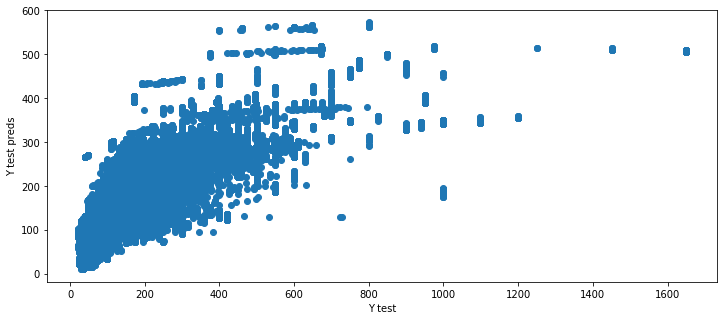

In [62]:
plt.figure(figsize=(12,5))
plt.scatter(y_test, y_test_preds)
plt.xlabel("Y test")
plt.ylabel("Y test preds")
plt.show()

In [63]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['input_variable'] = X_train.columns
    coefs_df['coef'] = lm_model.coef_
    coefs_df['abs_coef'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coef', ascending=False)
    return coefs_df

In [64]:
coef_df = coef_weights(lm_model.coef_, X_train)

In [65]:
coef_df.head(50)

,input_variable,coef,abs_coef
465,property_type_Dorm,-83.293619,83.293619
459,property_type_Boat,73.149477,73.149477
285,"location_categorical_('47.58', '-122.33')",68.047713,68.047713
358,"location_categorical_('47.66', '-122.27')",61.293850,61.293850
214,"location_categorical_('47.52', '-122.33')",-59.848448,59.848448
233,"location_categorical_('47.54', '-122.26')",-48.604532,48.604532
334,"location_categorical_('47.63', '-122.40')",44.870133,44.870133
451,"location_categorical_('47.73', '-122.32')",-37.456104,37.456104
355,"location_categorical_('47.65', '-122.40')",35.024975,35.024975
337,"location_categorical_('47.64', '-122.31')",32.741587,32.741587


#### Influence of neighbourhood on price

In [66]:
coef_df[coef_df["input_variable"].str.startswith("neighbourhood")]

,input_variable,coef,abs_coef
131,neighbourhood_cleansed_Southeast Magnolia,29.378914,29.378914
143,neighbourhood_cleansed_Windermere,27.990454,27.990454
141,neighbourhood_cleansed_Westlake,21.841269,21.841269
116,neighbourhood_cleansed_Pike-Market,18.723438,18.723438
72,neighbourhood_cleansed_Crown Hill,-17.362590,17.362590
118,neighbourhood_cleansed_Pioneer Square,16.912420,16.912420
93,neighbourhood_cleansed_Laurelhurst,-16.781963,16.781963
119,neighbourhood_cleansed_Portage Bay,16.537782,16.537782
89,neighbourhood_cleansed_Holly Park,12.933289,12.933289
139,neighbourhood_cleansed_West Queen Anne,12.634211,12.634211


#### Observing the coefficients of input variables other than those related to the location of property

In [67]:
coef_df[~coef_df["input_variable"].str.startswith("location") & ~coef_df["input_variable"].str.startswith("neighbourhood") & ~coef_df["input_variable"].str.startswith("zipcode")]

,input_variable,coef,abs_coef
465,property_type_Dorm,-83.293619,83.293619
459,property_type_Boat,73.149477,73.149477
476,room_type_Shared room,-24.960258,24.960258
1,bathrooms,22.477544,22.477544
165,city_Phinney Ridge Seattle,-19.898561,19.898561
2,bedrooms,16.876333,16.876333
474,room_type_Entire home/apt,15.353530,15.353530
56,amenity_Doorman,15.082998,15.082998
469,property_type_Tent,-14.800443,14.800443
475,room_type_Private room,-12.095616,12.095616


#### Influence of Month on price

In [68]:
coef_df[coef_df["input_variable"].str.startswith("month")]

,input_variable,coef,abs_coef
494,month_January,-7.232278,7.232278
495,month_July,7.114721,7.114721
491,month_August,6.514685,6.514685
493,month_February,-6.242518,6.242518
496,month_June,5.238841,5.238841
497,month_March,-3.717859,3.717859
501,month_September,2.310413,2.310413
490,month_April,-1.675812,1.675812
499,month_November,-1.652109,1.652109
492,month_December,-1.166114,1.166114


#### Influence of Day of week on price

In [69]:
coef_df[coef_df["input_variable"].str.startswith("day_of_week")]

,input_variable,coef,abs_coef
505,day_of_week_Saturday,2.812727,2.812727
503,day_of_week_Friday,2.809201,2.809201
508,day_of_week_Tuesday,-1.485158,1.485158
509,day_of_week_Wednesday,-1.326359,1.326359
504,day_of_week_Monday,-1.297643,1.297643
506,day_of_week_Sunday,-0.752015,0.752015
507,day_of_week_Thursday,-0.717727,0.717727
510,day_of_week_nan,0.000000,0.000000


#### Influence of Property type on price

In [70]:
coef_df[coef_df["input_variable"].str.startswith("property_type")]

,input_variable,coef,abs_coef
465,property_type_Dorm,-83.293619,83.293619
459,property_type_Boat,73.149477,73.149477
469,property_type_Tent,-14.800443,14.800443
473,property_type_nan,-8.733453,8.733453
468,property_type_Other,-8.038597,8.038597
462,property_type_Camper/RV,8.033000,8.033000
458,property_type_Bed & Breakfast,5.812037,5.812037
467,property_type_Loft,3.864930,3.864930
461,property_type_Cabin,3.590904,3.590904
472,property_type_Yurt,3.575956,3.575956


#### Influence of Amenities on price

In [71]:
coef_df[coef_df["input_variable"].str.startswith("amenity")]

,input_variable,coef,abs_coef
56,amenity_Doorman,15.082998,15.082998
53,amenity_Pool,9.920141,9.920141
57,amenity_Washer / Dryer,-9.171750,9.171750
21,amenity_Air Conditioning,8.698810,8.698810
48,amenity_Suitable for Events,8.602236,8.602236
18,amenity_Cable TV,7.634738,7.634738
39,amenity_Hot Tub,7.371406,7.371406
54,amenity_Smoking Allowed,-7.087119,7.087119
52,amenity_Gym,6.465466,6.465466
49,amenity_Elevator in Building,5.718472,5.718472


#### Observing the coefficients, there are several conclusions that can be made:
1. The properties of type Boat are very likely to have higher booking price
2. The dorm, shared room or tent type properties are very likely to have lower booking price
3. The precise location and neighbourhood that the property is located play very important role in deciding its booking price.
4. The number of bathrooms and bedrooms in the property are in strong positive proportion with the booking price.
5. The prices are also in positive proportion with the number of people it accommodates.
6. The amenities that strongly and positively influence the booking price are having doorman, pool, cable TV, hot tub, gym and elevator in the building.
7. The booking price tends to be higher in months July and August, while it tends to be lower in January and February.
8. Booking prices for Friday and Saturday tends to be higher relative to other days.
9. Permission of smoking as amenity has strong influence on the price on the negative side.
10. Properties located in Phinney Ridge Seattle city are less likely to have high price as per this trained model on the available data.
11. As all the properties in the dataset are located in Seattle, the attributes like market and jurisdiction are not playing any role in determining the price as they are not adding any variance in the input data. However, they might be of significance while training this same model on dataset containing listings across multiple cities and jurisdictions in the U.S.

In [73]:
listing_activation_dates.sort_values(by=["date"])

,listing_id,date
listing_id,,
4053972,4053972,2016-01-04
4783817,4783817,2016-01-04
4783585,4783585,2016-01-04
8487843,8487843,2016-01-04
8501721,8501721,2016-01-04
4772997,4772997,2016-01-04
8503556,8503556,2016-01-04
8505421,8505421,2016-01-04
4760181,4760181,2016-01-04


In [76]:
cal_by_listing_groups = s_calendar_cleaned.groupby(["listing_id"])

In [82]:
cal_by_listing_groups.head()

,listing_id,date,available,price,month,day_of_week
0,241032,2016-01-04,True,85.0,January,Monday
1,241032,2016-01-05,True,85.0,January,Tuesday
2,241032,2016-01-06,False,NaN,January,Wednesday
3,241032,2016-01-07,False,NaN,January,Thursday
4,241032,2016-01-08,False,NaN,January,Friday
365,953595,2016-01-04,True,125.0,January,Monday
366,953595,2016-01-05,True,125.0,January,Tuesday
367,953595,2016-01-06,False,NaN,January,Wednesday
368,953595,2016-01-07,False,NaN,January,Thursday
369,953595,2016-01-08,False,NaN,January,Friday


In [98]:
def select_entries_after_activation_date(g):

    listing_id = g.name
    activation_date_df = listing_activation_dates.query("listing_id == @listing_id")["date"]
    if activation_date_df.shape[0] > 0:        
        activation_date = activation_date_df.iloc[0]
#         print("activatation_date: " + str(activation_date))
#         print(g["date"].dtype)
#         print(type(activation_date))
        return g[g["date"] <= activation_date]
    
    
cal_after_activation_dates =cal_by_listing_groups.apply(select_entries_after_activation_date)